In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

snail_df = pd.read_csv('data.csv', names=columns)
snail_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Wymagania na ocenę dostateczną

In [4]:
# 1. Tabela rozkładu płci

# Zlicz ile jest unikalnych wierszy dla każdej wartości kategorycznej
sex_count_series = snail_df["Sex"].value_counts()

# Policz na podstawie poprzedniej serii frekwencje każdej wartości kategorycznej i zaokrąglij
sex_perc_series = 100 * sex_count_series/sex_count_series.sum()
sex_perc_series = sex_perc_series.round(2)

# Tworzenie DataFrame ze zmianą nazw wierszy
sex_df = pd.DataFrame({
        "count" : sex_count_series.values,
        "%" : sex_perc_series.values
    },
    index=["Male", "Infant", "Female"]
)

sex_df

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [5]:
# 2. Tabela miar rozkładu cech ilościowych

# Wszystkie cechy poza płcią
snail_description_df = snail_df[1:].describe()

# Po transpozycji wyrzuć kolumnę 'count'
snail_description_df = snail_description_df.T.drop(labels='count', axis=1)
snail_description_df

,mean,std,min,25%,50%,75%,max
Length,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


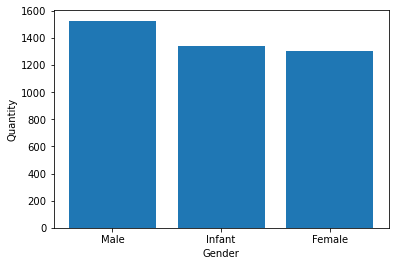

In [6]:
# 3. Wykres słupkowy liczebności poszczególnych wariantów płci

plt.bar(sex_df.index, sex_df["count"])
plt.xlabel("Gender")
plt.ylabel("Quantity")
plt.show()

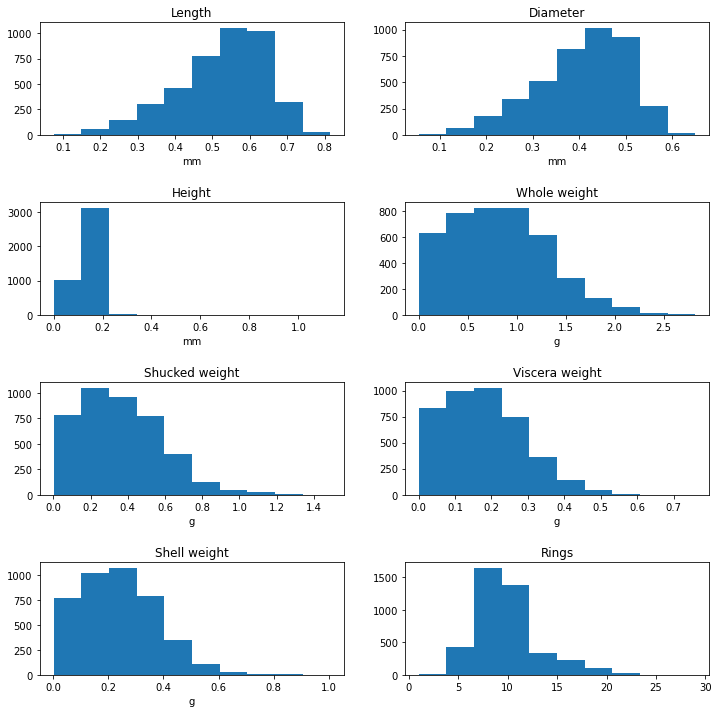

In [7]:
# 4. Histogramy cech ilościowych

# Stwórz obszar wykresów na 4 wiersze i 2 kolumny
fig, ax = plt.subplots(4, 2)

ax_flat = ax.flatten()

units = ['mm']*3 + ['g']*4 + ['']

# Stwórz po kolei histogramy wraz z tytułem i jednostką
for a, c, u in zip(ax_flat, columns[1:], units):
    a.hist(snail_df[c])
    a.set_title(c)
    a.set_xlabel(u)

# Popraw rozmiar i pozycję wykresów
fig.set_size_inches(12, 12)
plt.subplots_adjust(hspace=0.6)

plt.show()

## Wymagania na ocenę dobrą

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

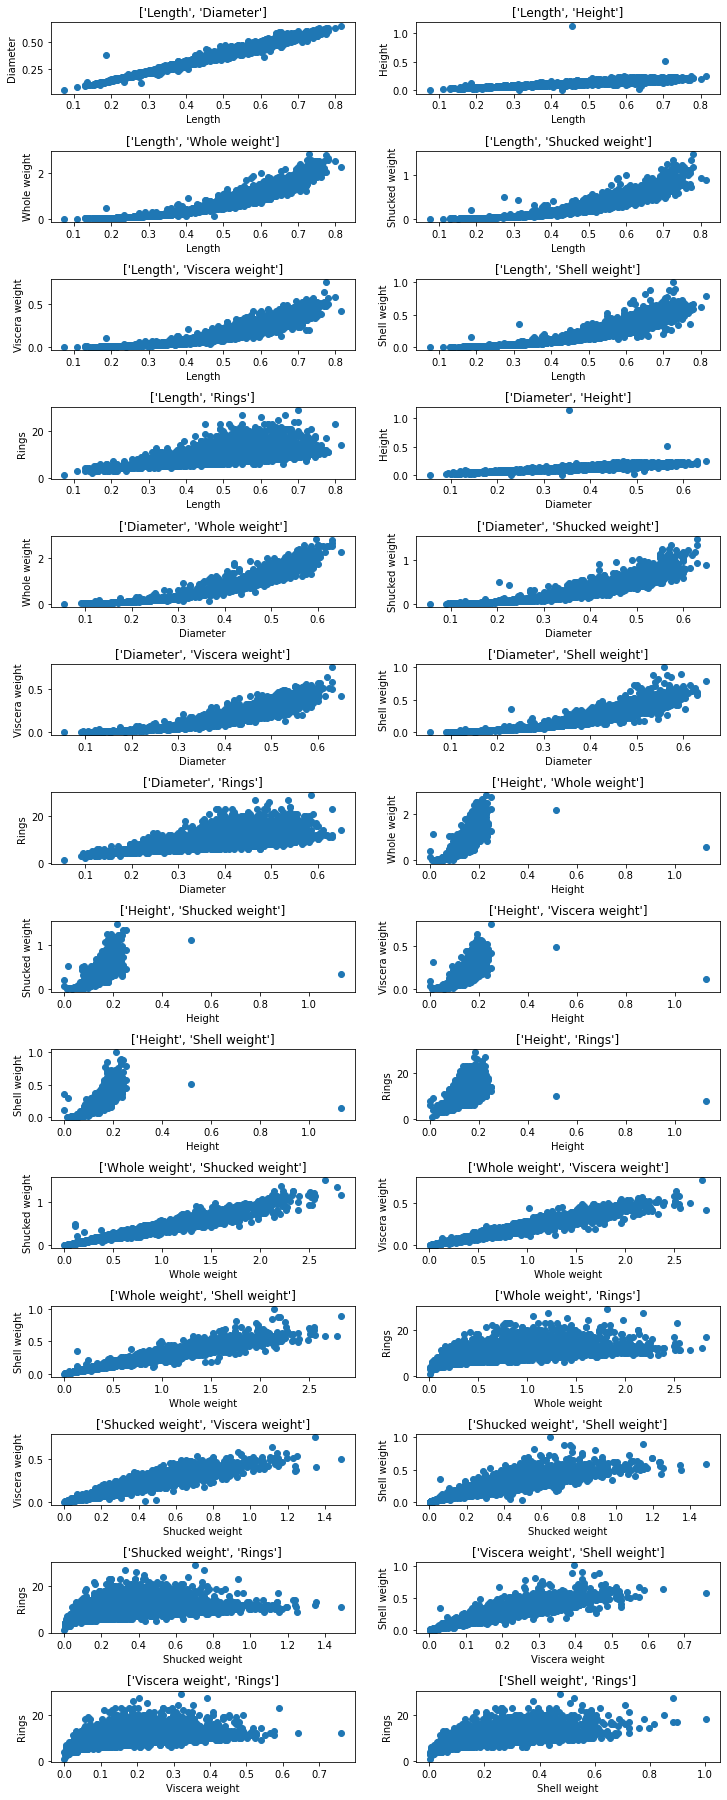

In [9]:
# 2. Dla par cech ilościowych stworzyć wykresy punktowe. Obszar 14x2

# Kombinacje par cech ilościowych z użyciem list comprehension
list_of_feature_pairs = [[c1, c2] for i1, c1 in enumerate(columns[1:]) for c2 in columns[i1+2:]]

# Stwórz obszar wykresów na 14 wierszy i 2 kolumny
fig, ax = plt.subplots(14, 2)

ax_flat = ax.flatten()

# Stwórz po kolei wykresy punktowe wraz z tytułem i jednostką
for a, cols in zip(ax_flat, list_of_feature_pairs):
    a.scatter(snail_df[cols[0]], snail_df[cols[1]])
    a.set_title(cols)
    a.set_xlabel(cols[0])
    a.set_ylabel(cols[1])

# Popraw rozmiar i pozycję wykresów
fig.set_size_inches(12, 32)
plt.subplots_adjust(hspace=0.8)

plt.show()

In [10]:
# 3. Macierz korelacji liniowej

# Tworzenie macierzy korelacji
corr = snail_df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

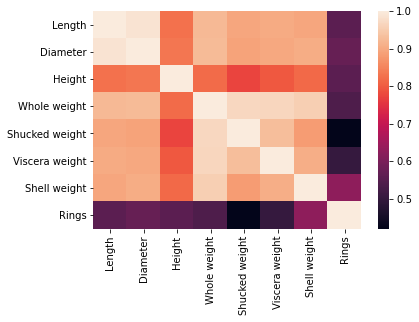

In [11]:
# 4. Wykres macierzy korelacji w postaci mapy cieplnej

sns.heatmap(corr)

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

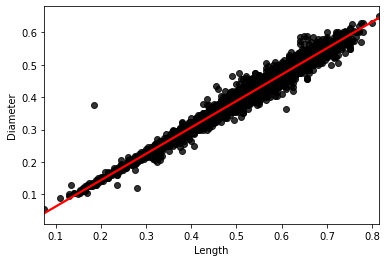

In [102]:
# 5. Wykres regresji liniowej dla cech ilościowych najbardziej skorelowanych

# Dictionary comprehension w celu znalezienia maksymalnej wartości
# macierzy korelacyjnej nie będącej na linii diagonalnej
dict_corr = {(x,y) : corr[x][y] for x, y in list_of_feature_pairs}

# Index słownika o największej wartości
max_corr_features_ind = np.argmax(dict_corr.values())

# Nazwy cech najbardziej skorelowanych liniowo
max_corr_featrues = list(dict_corr.keys())[max_corr_features_ind]

sns.regplot(x=max_corr_featrues[0], y=max_corr_featrues[1], data=snail_df,
           scatter_kws={"color": "black"}, line_kws={"color": "red"})

## Wymagania na ocenę bardzo dobrą

### To be continued